## DATA SCIENCE INTERNSHIP @CodeAlpha

TASK 2 - TITANIC CLASSIFICATION

Make a system which tells whether the personwill be save from sinking. What factors weremost likely lead to success-socio-economicstatus, age, gender and more.


In [ ]:
The dataset is available at Kaggle: https://www.kaggle.com/c/titanic/data

Data Loading and Importing the necessary libraries

In [1]:
# Linear algebra
import numpy as np

# Data manipulation and analysis
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

/Users/varun/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In this analysis, we import and exclusively focus on the Training set from the Titanic dataset. 
Validation will be performed using data from the training set. 
Final predictions for submissions will be based on the test set.

In [2]:
train_t = pd.read_csv('train1.csv')
test_t = pd.read_csv('test1.csv')

train_t['train_test'] = 1
test_t['train_test'] = 0
# test_t['Survived'] = np.NaN
all_data = pd.concat([train_t,test_t])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [3]:
train_t.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [4]:
test_t.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [5]:
#removing the columns
train_t = train_t.drop(columns=['PassengerId','Name','Cabin','Ticket'], axis= 1)

In [6]:
train_t.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [8]:
#Checking the Data types
train_t.dtypes

Survived        int64
Pclass          int64
Sex            object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
train_test      int64
dtype: object

In [9]:
#checking for unique value count
train_t.nunique()

Survived        2
Pclass          3
Sex             2
Age            88
SibSp           7
Parch           7
Fare          248
Embarked        3
train_test      1
dtype: int64

In [10]:
#checking for missing value count
train_t.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
train_test      0
dtype: int64

Refining the Data

In [12]:
# replacing the missing values
train_t['Age'] =  train_t['Age'].replace(np.nan,train_t['Age'].median(axis=0))
train_t['Embarked'] = train_t['Embarked'].replace(np.nan, 'S')

In [13]:
#Changing the Data type
train_t['Age'] = train_t['Age'].astype(int)

In [14]:
#Replacing Male with 1 and Female with 0
train_t['Sex'] = train_t['Sex'].apply(lambda x : 1 if x == 'male' else 0)

Categorising in groups i.e. Infant(0-5), Teen (6-20), 20s(21-30), 30s(31-40), 40s(41-50), 50s(51-60), Elder(61-100).

In [15]:
# creating age groups - young (0-18), adult(18-30), middle aged(30-50), old (50-100)
train_t['Age'] = pd.cut(x=train_t['Age'], bins=[0, 5, 20, 30, 40, 50, 60, 100], labels = ['Infant', 'Teen', '20s', '30s', '40s', '50s', 'Elder'])

## Exploratory Data Analysis

Plotting the Countplot to visualize the numbers

<AxesSubplot:xlabel='Parch', ylabel='count'>

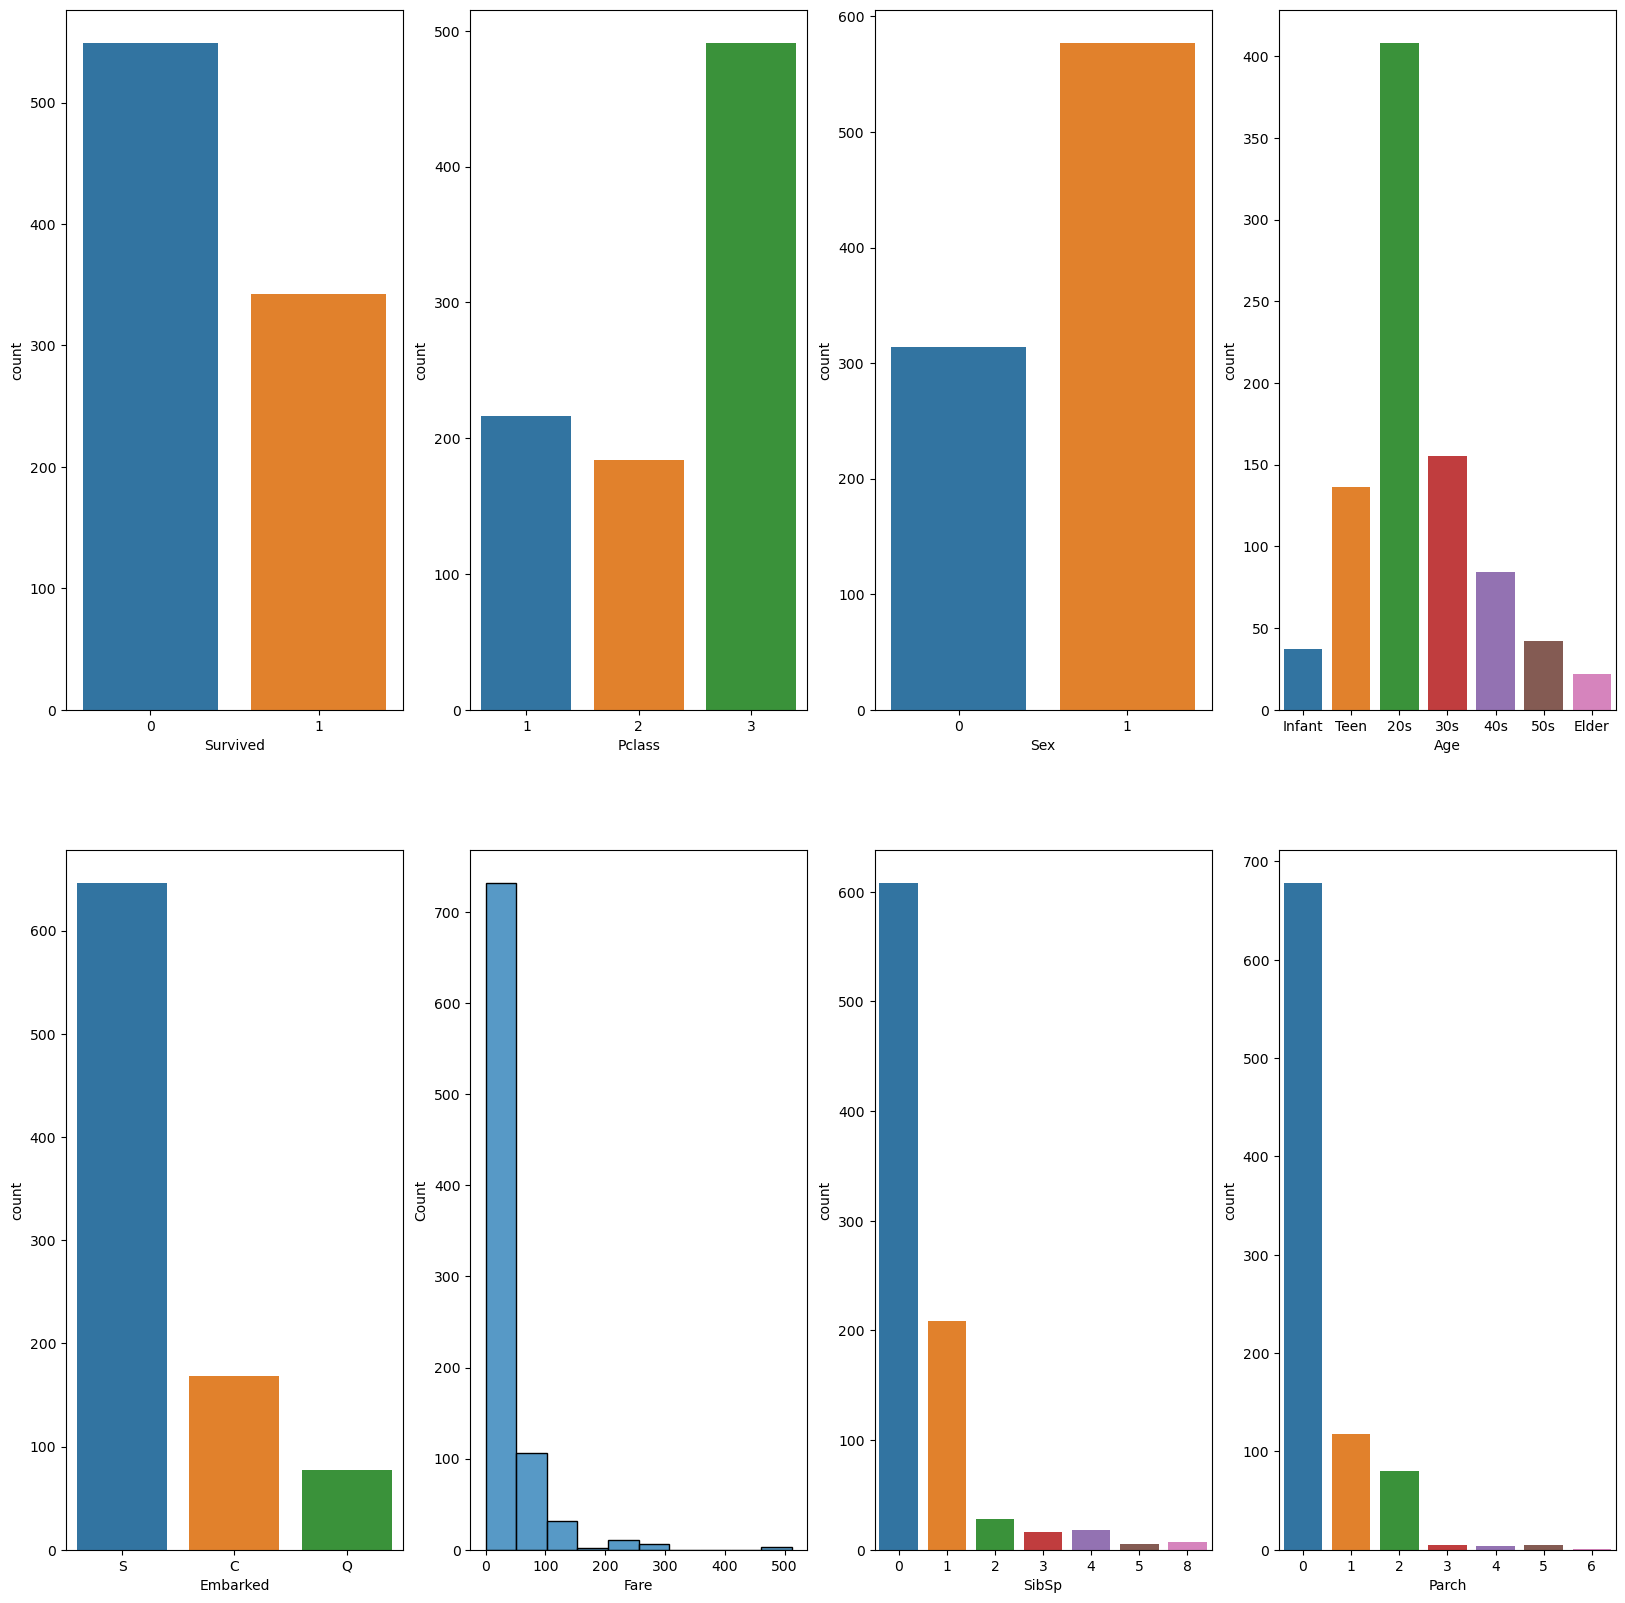

In [16]:
# visulizing the count of the features
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.countplot(x = 'Survived', data = train_t, ax= ax[0,0])
sns.countplot(x = 'Pclass', data = train_t, ax=ax[0,1])
sns.countplot(x = 'Sex', data = train_t, ax=ax[0,2])
sns.countplot(x = 'Age', data = train_t, ax=ax[0,3])
sns.countplot(x = 'Embarked', data = train_t, ax=ax[1,0])
sns.histplot(x = 'Fare', data= train_t, bins=10, ax=ax[1,1])
sns.countplot(x = 'SibSp', data = train_t, ax=ax[1,2])
sns.countplot(x = 'Parch', data = train_t, ax=ax[1,3])

Visualizing the relationship between the features

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

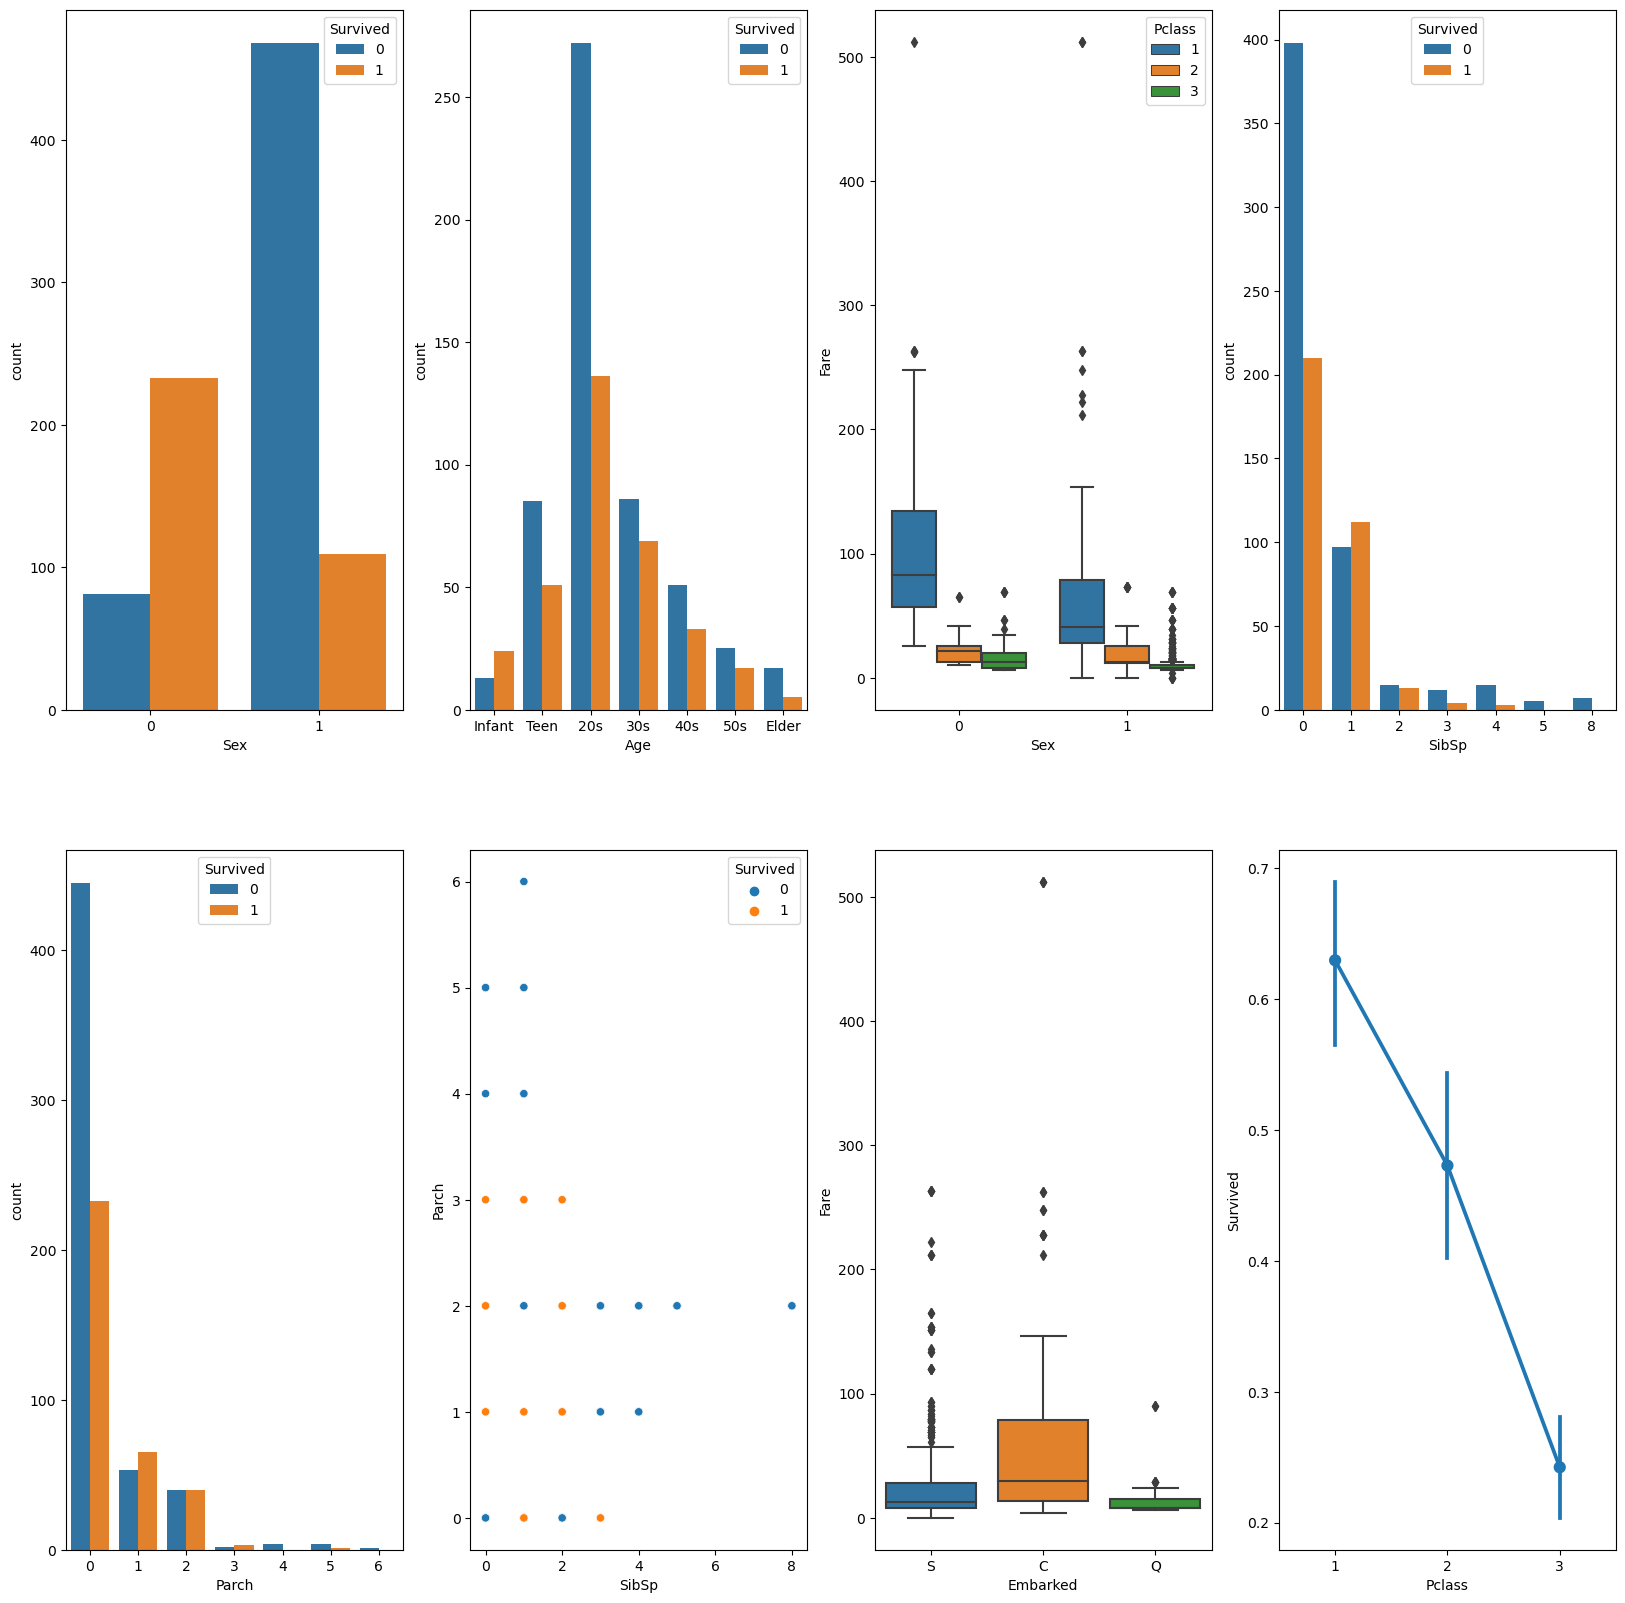

In [17]:
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.countplot(x = 'Sex', data = train_t, hue = 'Survived', ax= ax[0,0])
sns.countplot(x = 'Age', data = train_t, hue = 'Survived', ax=ax[0,1])
sns.boxplot(x = 'Sex',y='Fare', data = train_t, hue = 'Pclass', ax=ax[0,2])
sns.countplot(x = 'SibSp', data = train_t, hue = 'Survived', ax=ax[0,3])
sns.countplot(x = 'Parch', data = train_t, hue = 'Survived', ax=ax[1,0])
sns.scatterplot(x = 'SibSp', y = 'Parch', data = train_t,hue = 'Survived', ax=ax[1,1])
sns.boxplot(x = 'Embarked', y ='Fare', data = train_t, ax=ax[1,2])
sns.pointplot(x = 'Pclass', y = 'Survived', data = train_t, ax=ax[1,3])

In [ ]:
Data Pre-Processing

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['S','C','Q'])
train_t['Embarked'] = le.transform(train_t['Embarked'])

In [20]:
age_mapping = {
    'infant': 0,
    'teen': 1,
    '20s': 2,
    '30s': 3,
    '40s': 4,
    '50s': 5,
    'elder': 6}
train_t['Age'] = train_t['Age'].map(age_mapping)
train_t.dropna(subset=['Age'], axis= 0, inplace = True)

## Correlation Heatmap

<AxesSubplot:>

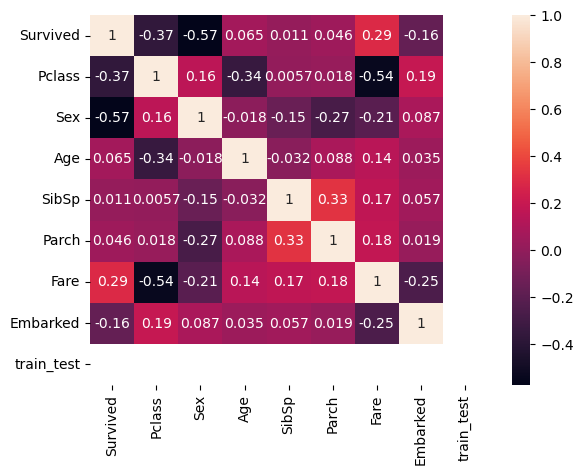

In [21]:
sns.heatmap(train_t.corr(), annot= True)

Separating the target and independent variable

In [22]:
y = train_t['Survived']
x = train_t.drop(columns=['Survived'])

## Model Training

In [ ]:
Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [24]:
lr.fit(x,y)
lr.score(x,y)

0.818577648766328

Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [26]:
dtree.fit(x,y)
dtree.score(x,y)

0.9404934687953556

In [ ]:
K-Nearest Neighbor

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [28]:
knn.fit(x,y)
knn.score(x,y)

/Users/varun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8214804063860668

Support Vector Machine (SVM)

In [29]:
from sklearn.svm import SVC
svm = SVC()
svm

SVC()

In [30]:
svm.fit(x,y)
svm.score(x,y)

0.7024673439767779

From the above four model Decision Tree Classifier has the highest Training accuracy, so only Decision Tree Classifier will work on the Test Set